In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


MessageError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
from numpy import expand_dims


import matplotlib.pyplot as plt

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory('gdrive/MyDrive/jabłka/AppleScabFDs',
                                                            shuffle=True,
                                                            batch_size=16,
                                                            image_size=(256,256))


Found 310 files belonging to 3 classes.


In [ ]:
num = 4
test_d = dataset.take(num)
train_d = dataset.skip(num)


In [ ]:
data_augmentation = tf.keras.Sequential([       
  tf.keras.layers.RandomFlip('horizontal'),           #losowe zmiany położenia obrazu żeby zwiększyć ogólne dopasowanie sieci i przeciwdziałać overfittingowi
  tf.keras.layers.RandomRotation(0.2),
])


resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255)
])




In [ ]:
batch_size = 16
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False, augment_x_times = 3):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)
  
  if augment:
    aug = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    for i in range(augment_x_times-2):
      augment = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
      aug = aug.concatenate(augment)
    ds = ds.concatenate(aug)
  if shuffle:
    ds = ds.shuffle(1000)
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_d = prepare(train_d, shuffle=True, augment=True, augment_x_times=10) #dorabiam zarówno danych treningowch i testowych żeby validation_loss i accuracy były bardziej wiarygodne
test_d = prepare(test_d,augment=True, augment_x_times=10)

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten

model_1 = tf.keras.Sequential()
#model_1.add(data_augmentation)

model_1.add(Conv2D(input_shape = (256,256,3), filters = 16, kernel_size=(9, 9), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(Conv2D( filters = 32, kernel_size=(7, 7), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(MaxPooling2D(strides=2, padding='valid'))

model_1.add(Conv2D( filters = 32, kernel_size=(7, 7), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(Conv2D( filters = 32, kernel_size=(5, 5), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(MaxPooling2D(strides=2, padding='valid'))

model_1.add(Conv2D( filters = 64, kernel_size=(5, 5), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(MaxPooling2D(strides=2, padding='valid'))

model_1.add(Conv2D( filters = 64, kernel_size=(5, 5), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(MaxPooling2D(strides=2, padding='valid'))

model_1.add(Conv2D( filters = 128, kernel_size=(5, 5), activation='leaky_relu', padding='same', use_bias=False))
model_1.add(MaxPooling2D(strides=2, padding='valid'))
model_1.add(Conv2D( filters = 128, kernel_size=(5, 5), activation='leaky_relu', padding='same', use_bias=False))

model_1.add(GlobalAveragePooling2D())
model_1.add(Flatten())
model_1.add(Dense(128, activation = 'leaky_relu', use_bias = False))
#model_1.add(Dense(16, activation = 'leaky_relu', use_bias = False))
model_1.add(Dropout(0.2))

model_1.add(Dense(3, activation = 'softmax', use_bias = False))
model_1.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      3888      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25088     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      50176     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      25600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [ ]:
model = tf.keras.Sequential()

# glorot_normal means xavier normal initializer
model.add(Conv2D(input_shape=(256, 256, 3), kernel_size=(8,8), filters=16, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(6,6), filters=32, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(7,7), filters=32, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=64, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(5,5), filters=128, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalAveragePooling2D())


#model.add(Dropout(0.2))
model.add(Dense(512, use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      3072      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 251, 251, 32)      18432     
                                                                 
 batch_normalization_1 (Batc  (None, 251, 251, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 251, 251, 32)     

In [ ]:
from keras.callbacks import EarlyStopping
sgd = tf.keras.optimizers.SGD(learning_rate=0.00005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,    #ustawienie learning rate, optimizera i funkcji straty
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False, reduction = 'auto'),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
history = model.fit(train_d, epochs=20, validation_data = test_d, verbose = 1, callbacks = [es])

Epoch 1/20
160/160 [==============================] - 266s 721ms/step - loss: 0.4396 - accuracy: 0.8256 - val_loss: 1.4824 - val_accuracy: 0.5437
Epoch 2/20
160/160 [==============================] - 266s 719ms/step - loss: 0.3690 - accuracy: 0.8533 - val_loss: 0.8242 - val_accuracy: 0.6469
Epoch 3/20
160/160 [==============================] - 267s 717ms/step - loss: 0.3427 - accuracy: 0.8707 - val_loss: 0.4343 - val_accuracy: 0.8281
Epoch 4/20
160/160 [==============================] - 267s 724ms/step - loss: 0.2932 - accuracy: 0.8931 - val_loss: 0.2683 - val_accuracy: 0.9000
Epoch 5/20
160/160 [==============================] - 264s 717ms/step - loss: 0.2600 - accuracy: 0.9033 - val_loss: 0.2941 - val_accuracy: 0.8828
Epoch 6/20
160/160 [==============================] - 265s 717ms/step - loss: 0.2263 - accuracy: 0.9187 - val_loss: 0.2533 - val_accuracy: 0.8984
Epoch 7/20
160/160 [==============================] - 264s 715ms/step - loss: 0.2090 - accuracy: 0.9276 - val_loss: 0.2445 -

In [ ]:
model.save('gdrive/MyDrive/jabłka/Model')

INFO:tensorflow:Assets written to: gdrive/MyDrive/jabłka/Model/assets


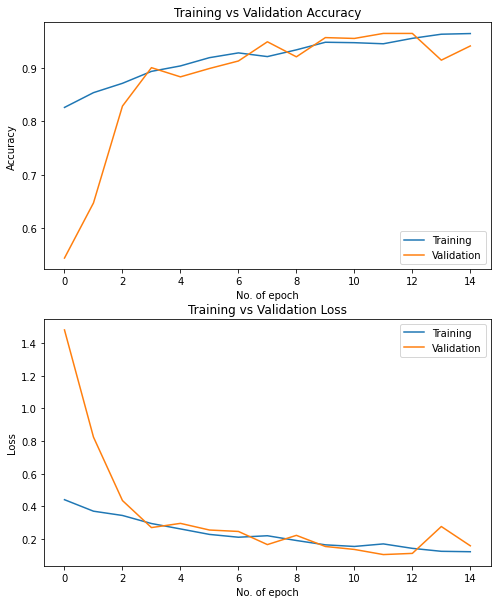

In [ ]:
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("No. of epoch")
plt.legend(['Training', 'Validation'],loc='upper right')

[0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0]
[0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0]
Score: 0.875


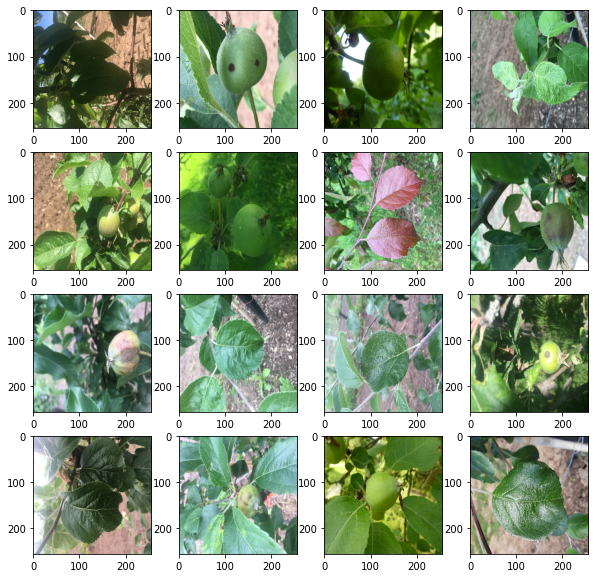

In [ ]:
plt.figure(figsize=(10,10))
for img,y in test_d.take(1):
  #print(model.predict(img))
  lista_pred = [np.argmax(i) for i in model.predict(img)]
  lista_fak = []
  img = img.numpy()
  for num in range(16):
    #print(y[num])
    lista_fak.append(y[num].numpy())
    plt.subplot(4,4,1+num)
    plt.imshow(img[num])
  print(lista_fak)
  print(lista_pred)
  value = 0
  for i,j in zip(lista_fak, lista_pred):
    if i == j:
      value+=1
  print("Score: "+str(value/16))

ValueError: ignored